## IOSD JUNIOUR COUNCIL NB
* Task1
* Task2

Task1

On this dataset, implement kernel SVM for classification and provide a comparative study using different kernels(linear, polynomial, gaussian, sigmoid, RBF etc) using precision and f1-scores. 

Now, if you think it's right up your alley, go for it! However, in case you need a bit of a background as to what SVM classifier actually is, keep reading!



In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import precision_score,f1_score
from sklearn.svm import SVC
from sklearn.svm import SVR
from sklearn.metrics import roc_auc_score,f1_score,accuracy_score
from sklearn.preprocessing import MinMaxScaler,LabelEncoder,StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold,learning_curve,train_test_split

In [3]:
df=pd.read_csv("../input/nasa-nearest-earth-objects/neo.csv")

In [4]:
df.describe()

,id,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,absolute_magnitude
count,9.083600e+04,90836.000000,90836.000000,90836.000000,9.083600e+04,90836.000000
mean,1.438288e+07,0.127432,0.284947,48066.918918,3.706655e+07,23.527103
std,2.087202e+07,0.298511,0.667491,25293.296961,2.235204e+07,2.894086
min,2.000433e+06,0.000609,0.001362,203.346433,6.745533e+03,9.230000
25%,3.448110e+06,0.019256,0.043057,28619.020645,1.721082e+07,21.340000
50%,3.748362e+06,0.048368,0.108153,44190.117890,3.784658e+07,23.700000
75%,3.884023e+06,0.143402,0.320656,62923.604633,5.654900e+07,25.700000
max,5.427591e+07,37.892650,84.730541,236990.128088,7.479865e+07,33.200000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90836 entries, 0 to 90835
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  90836 non-null  int64  
 1   name                90836 non-null  object 
 2   est_diameter_min    90836 non-null  float64
 3   est_diameter_max    90836 non-null  float64
 4   relative_velocity   90836 non-null  float64
 5   miss_distance       90836 non-null  float64
 6   orbiting_body       90836 non-null  object 
 7   sentry_object       90836 non-null  bool   
 8   absolute_magnitude  90836 non-null  float64
 9   hazardous           90836 non-null  bool   
dtypes: bool(2), float64(5), int64(1), object(2)
memory usage: 5.7+ MB


In [6]:
df.head()

,id,name,est_diameter_min,est_diameter_max,relative_velocity,miss_distance,orbiting_body,sentry_object,absolute_magnitude,hazardous
0,2162635,162635 (2000 SS164),1.198271,2.679415,13569.249224,5.483974e+07,Earth,False,16.73,False
1,2277475,277475 (2005 WK4),0.265800,0.594347,73588.726663,6.143813e+07,Earth,False,20.00,True
2,2512244,512244 (2015 YE18),0.722030,1.614507,114258.692129,4.979872e+07,Earth,False,17.83,False
3,3596030,(2012 BV13),0.096506,0.215794,24764.303138,2.543497e+07,Earth,False,22.20,False
4,3667127,(2014 GE35),0.255009,0.570217,42737.733765,4.627557e+07,Earth,False,20.09,True


In [7]:
int_f=[None]
obj=["name"]
flt=["est_diameter_min",
    "est_diameter_max",
    "relative_velocity",
    "miss_distance"
    ]
bul=["sentry_object",
     "hazardous"]
y=["hazardous"]

In [8]:
df_hazardous=1#hazardous
df_unhazardous=1
for i in df.groupby(y):
    if i[0]==False:
        df_unhazardous=i[1]
    elif i[0]==True:
        df_hazardous=i[1]
    

# EDA

In [9]:
enc=LabelEncoder()
a=enc.fit_transform(df[y])
b=enc.fit_transform(df[bul[0]])
#c=enc.fit_transform(df[bul[1]])

/opt/conda/lib/python3.7/site-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [10]:
len(df[y])==len(a)

True

In [11]:
df[y[0]]=a
df[bul[0]]=b
#df[bul[1]]=c

<AxesSubplot:ylabel='Count'>

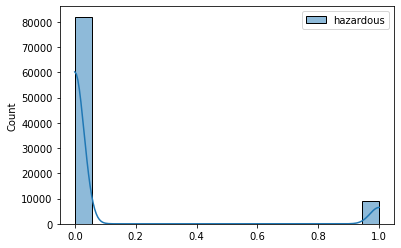

In [12]:
sns.histplot(df[y],kde=True)

UNBALANCED DATA
## continous data correlation heat maps

<AxesSubplot:>

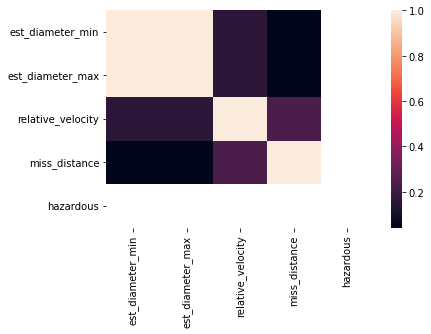

In [13]:
sns.heatmap(df_hazardous[flt+y].corr())

<AxesSubplot:>

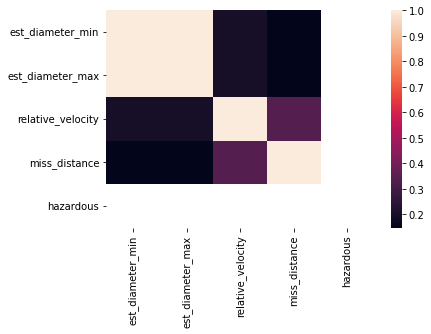

In [14]:
sns.heatmap(df_unhazardous[flt+y].corr())

<AxesSubplot:>

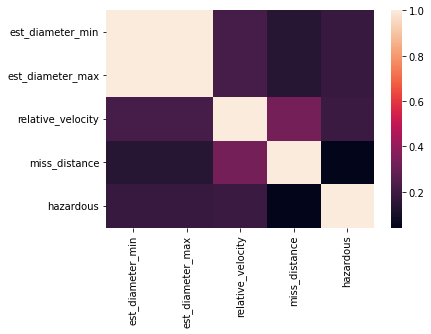

In [15]:
sns.heatmap(df[flt+y].corr())

In [16]:
for i in df.orbiting_body.unique():
    print(i)
# useless column

Earth


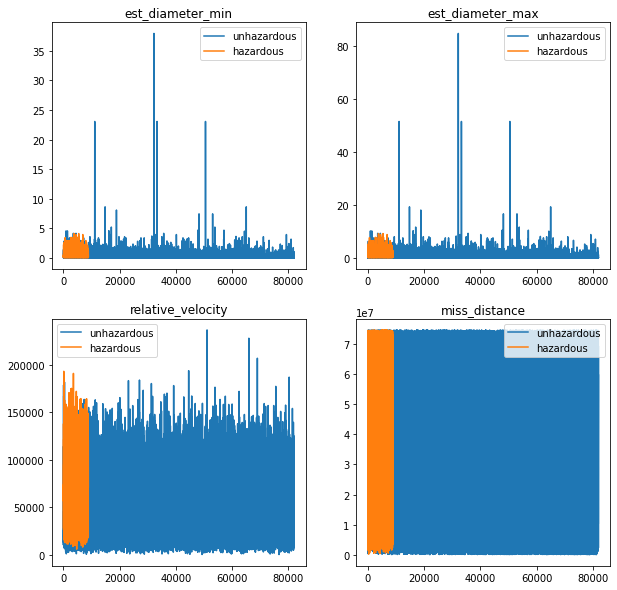

In [17]:
plt.figure(figsize=(10,10))
j=1
for i in flt:
    plt.subplot(2,2,j)
    plt.plot(df_unhazardous[i].values)
    plt.plot(df_hazardous[i].values)
    plt.legend({"unhazardous":df_unhazardous[i],"hazardous":df_hazardous[i]})
    plt.title(i)
    j+=1

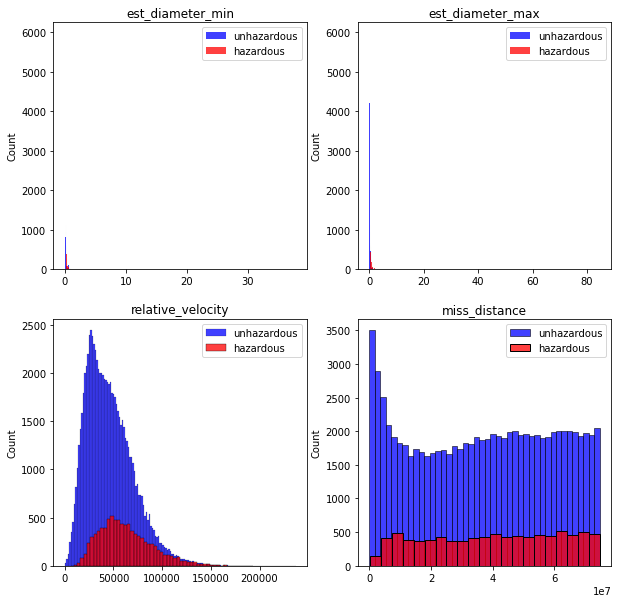

In [18]:
plt.figure(figsize=(10,10))
j=1
for i in flt:
    plt.subplot(2,2,j)
    sns.histplot(df_unhazardous[i].values,color="b")
    sns.histplot(df_hazardous[i].values,color="r")
    plt.legend({"unhazardous":df_unhazardous[i],"hazardous":df_hazardous[i]})
    plt.title(i)
    j+=1

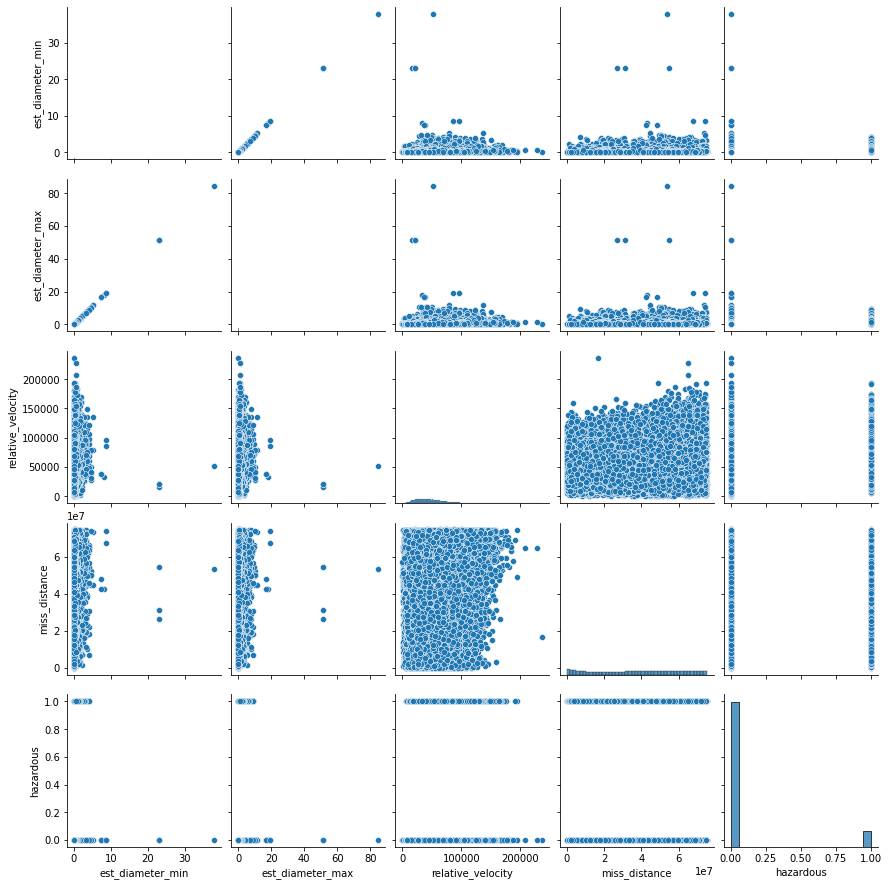

In [34]:
sns.pairplot(df[flt+y])

In [53]:
def model():
    return {"svc":  SVC()}

In [54]:
features=[i for i in df.columns if i not in ["id","name","orbiting_body"]]

In [136]:
model=SVC(verbose=True,gamma="scale",probability=True)
feat=[i for i in df.columns]
x_train,x_valid=train_test_split(df[feat])

In [137]:
x_valid.hazardous.value_counts()

0    20501
1     2208
Name: hazardous, dtype: int64

In [138]:
x_train.hazardous.value_counts()

0    61495
1     6632
Name: hazardous, dtype: int64

In [139]:
history=model.fit(x_train[features],x_train.hazardous)

[LibSVM]..........................................................................................*.....................................*
optimization finished, #iter = 127366
obj = -7559.343409, rho = 0.892484
nSV = 54356, nBSV = 5208
Total nSV = 54356
........................................................................................*.........................................*
optimization finished, #iter = 129458
obj = -7591.306462, rho = 0.891941
nSV = 54367, nBSV = 5231
Total nSV = 54367
........................................................................................*..........................................*
optimization finished, #iter = 130763
obj = -7618.638046, rho = 0.891572
nSV = 54349, nBSV = 5246
Total nSV = 54349
........................................................................................*..........................................*
optimization finished, #iter = 130643
obj = -7616.916743, rho = 0.891633
nSV = 54354, nBSV = 5248
Total nSV = 54354


In [140]:
preds=model.predict(x_valid[features])

In [145]:
preds1=model.predict_proba(x_valid[features])

In [146]:
preds

array([0, 0, 0, ..., 0, 0, 0])

In [147]:
pd.Series(preds).unique()

array([0, 1])

In [148]:
roc_auc_score(preds,x_valid["hazardous"])

0.9527606007067138

In [149]:
f1_score(preds,x_valid["hazardous"])

0.06060606060606061

In [122]:
accuracy_score(preds,x_valid["hazardous"])

0.9021533312783477

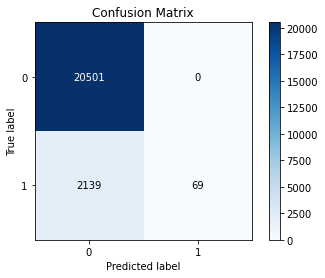

In [150]:
import scikitplot as skplt
import matplotlib.pyplot as plt

y_true = x_valid["hazardous"].values
y_probas = preds
skplt.metrics.plot_confusion_matrix( y_true , y_probas )
plt.show()

sucky confusion matrixes

/opt/conda/lib/python3.7/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


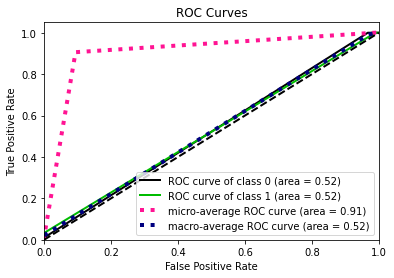

In [151]:
y_true = x_valid["hazardous"].values
y_probas = preds1
skplt.metrics.plot_roc_curve( y_true , y_probas )
plt.show()

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

(array([0, 0, 0, ..., 0, 0, 0]), array([0, 0, 0, ..., 0, 0, 1]))